In [1]:
import numpy as np
import matplotlib.pyplot as plt


# 生成矩阵

In [2]:
def generate_random_orthogonal_matrix(n):
    """生成随机正交矩阵"""
    A = np.random.randn(n, n)
    Q, R = np.linalg.qr(A)
    return Q


In [3]:
n = 128
alpha = -np.log(2)
np.random.seed(0)

# 生成奇异值指数衰减的矩阵
U = generate_random_orthogonal_matrix(n)
Sigma = 2. ** (-np.arange(n))
V = generate_random_orthogonal_matrix(n)
A = U @ np.diag(Sigma) @ V.T

# 逐元素打印矩阵，以输入 C++
with open("matrix.txt", "w", encoding="utf-8") as f:
    print(n, n, file=f)
    for i in range(n):
        print(*A[i], file=f)

# 绘制图表

In [4]:
def plot_singular_values(Sigma, cgs_rjj, householder_rjj):
    """绘制奇异值"""
    MACHINE_EPSILON = np.finfo(float).eps
    SQRT_MACHINE_EPSILON = np.sqrt(MACHINE_EPSILON)

    fig = plt.figure(figsize=(8, 6), dpi=150, layout="tight")
    ax = fig.add_subplot(111)

    ax.axhline(y=MACHINE_EPSILON, color="black", linestyle="--", label=r"$\varepsilon_{machine}$")
    ax.axhline(y=SQRT_MACHINE_EPSILON, color="black", linestyle="--", label=r"$\sqrt{\varepsilon_{machine}}$")

    ax.plot(Sigma, label="Singular Values")
    ax.plot(cgs_rjj, label="Classical Gram Schmidt $R_{jj}$'s")
    ax.plot(householder_rjj, label="Householder QR $R_{jj}$'s")

    ax.set_yscale("log", base=2)
    
    ax.set_title("Singular Values and $R_{jj}$'s")
    ax.set_xlabel("Index")

    ax.legend()

    return fig

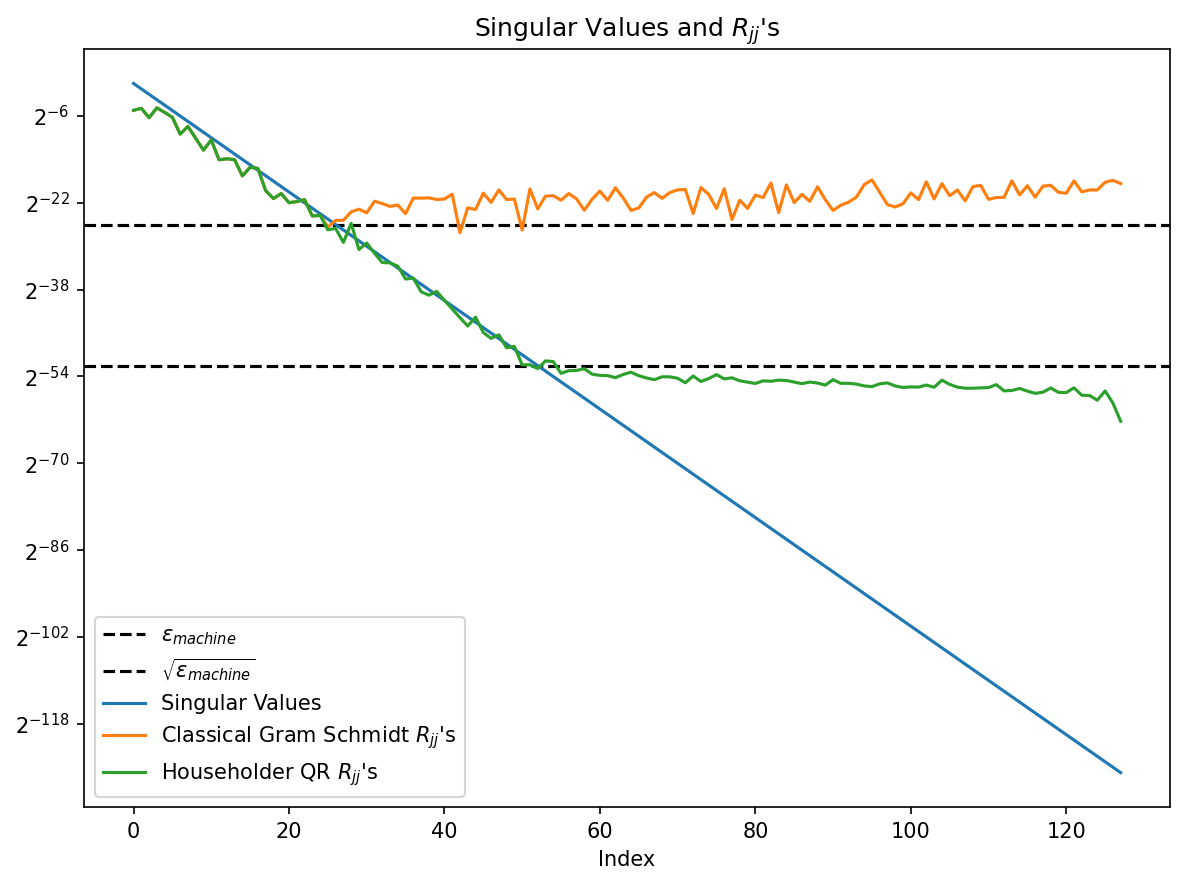

In [5]:
with open("rjj.txt", "r", encoding="utf-8") as f:
    line1, line2 = f.readline(), f.readline()

cgs_rjj = np.array([float(x) for x in line1.split()])
householder_rjj = np.array([float(x) for x in line2.split()])

# cgs_rjj = np.sort(cgs_rjj)[::-1]
householder_rjj = np.abs(householder_rjj)

fig = plot_singular_values(Sigma, cgs_rjj, householder_rjj)
fig.savefig("../problem_4_plot.png", dpi=300)
fig.show()